#Introdução	à	Ciência	de	Dados

#Lista	de	exercícios	2

##Nome: João Victor Sene Araújo
##NUSP: 11796382

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Pandas: usada para manipulação de dados
from scipy.stats import iqr # Usado para calcular a amplitude interquartil
import seaborn as sns # Biblioteca para mostrar os gráficos
from scipy.ndimage.measurements import mean
sns.set()

from scipy.stats import pearsonr, spearmanr

###1 - Gere dados a partir de uma distribuição de Poisson. Varie a taxas λ no intervalo [1,10] e mostre o gráfico da média em função da variância.

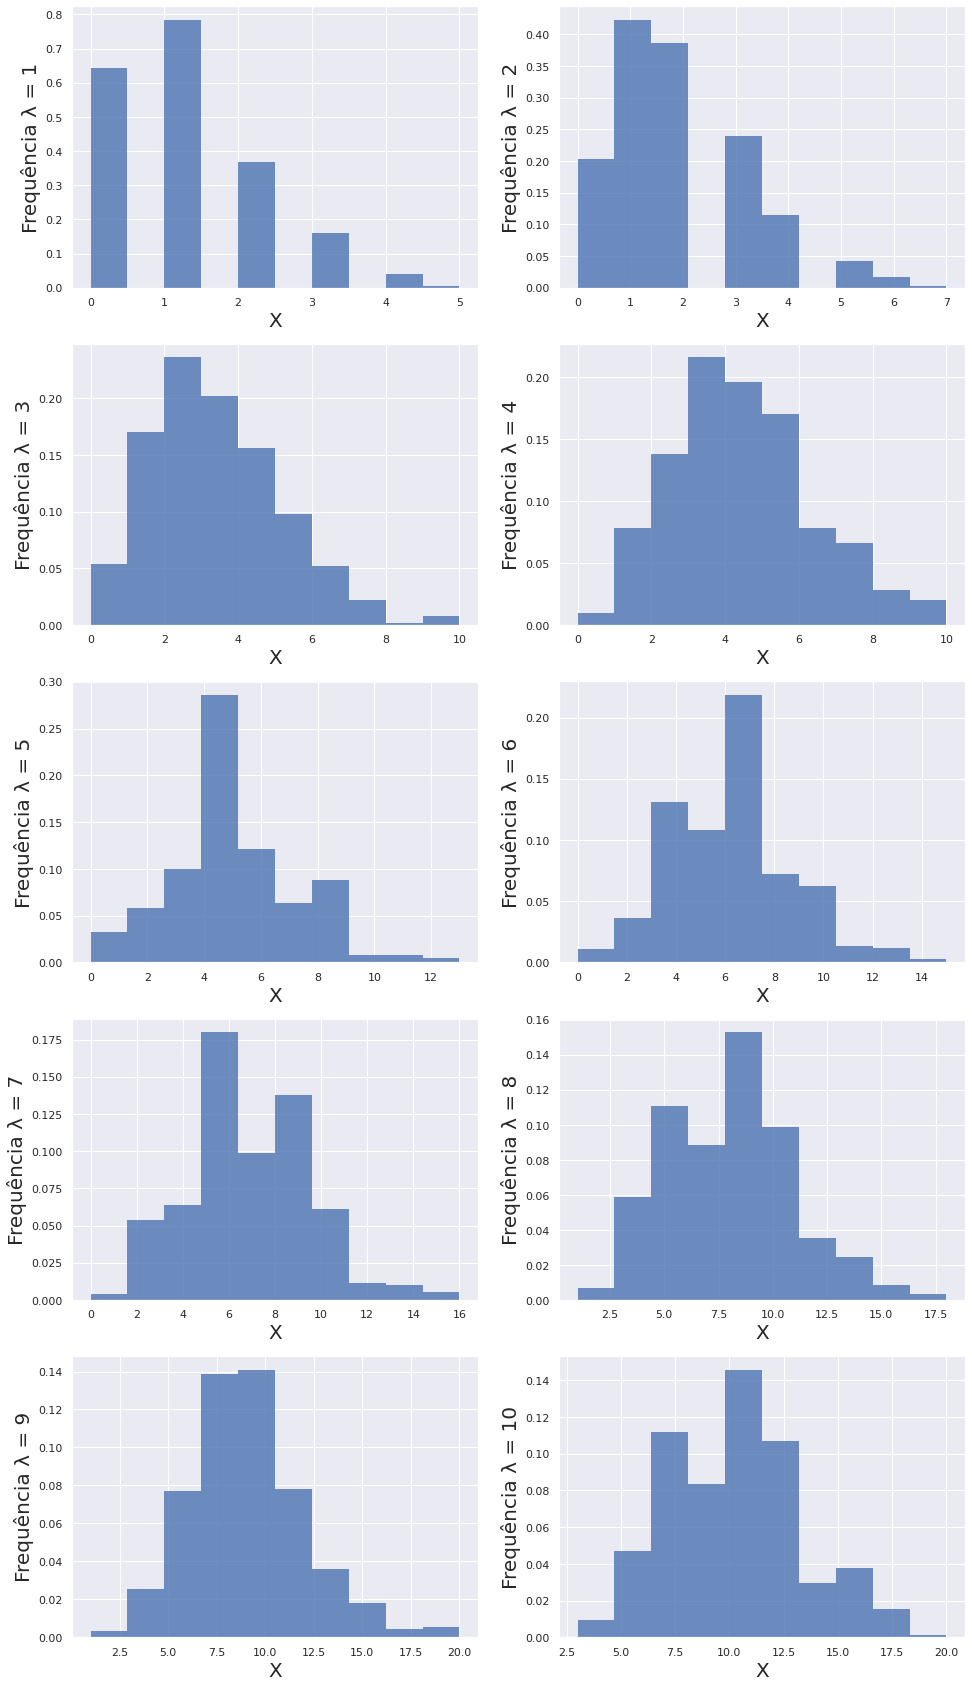

In [ ]:
X = []
N=500

m = 5
k = 2

fig, axes = plt.subplots(m, k,figsize=(16,30))

for i in range(1,11):
  # Gera pontos randomicos de uma distribuição de Poisson para determinado lambda (varia no intervalo [1,10])
  Y = np.random.poisson(lam=(i), size=(N))

  X.append(Y)

  # Determina as coordenadas do subplot
  x = ((i-1)//k) 
  y = (i-1)%k

  axes[x,y].hist(Y, density=True,lw=0,alpha=.8)
  axes[x,y].set_xlabel("X",fontsize = 20)  
  axes[x,y].set_ylabel("Frequência λ = "+str(i), fontsize = 20)

plt.show(True)

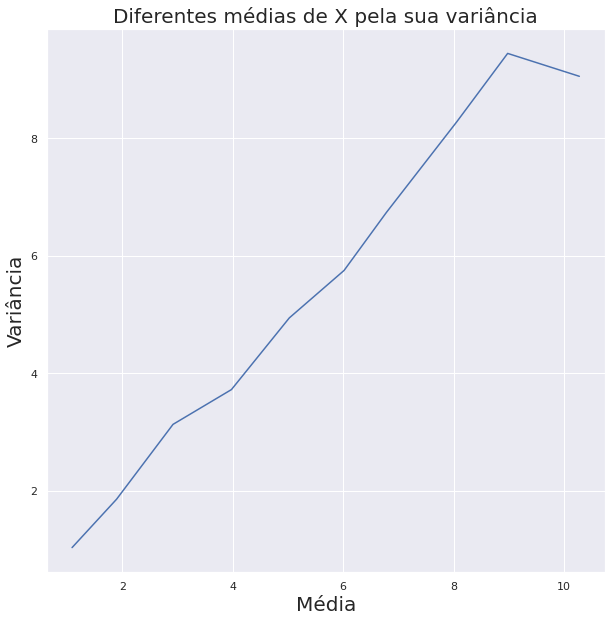

In [ ]:
mT = []
varT = []

for x in X:
  mx = np.mean(x) # Calcula a média
  varx = sum((xi - mx) ** 2 for xi in x) / len(x) # Calcula a variância
  mT.append(mx)
  varT.append(varx)

# Plot do gráfico Média x Variância
plt.figure(figsize=(10,10)) 
plt.plot(mT, varT)
plt.title('Diferentes médias de X pela sua variância',fontsize = 20)
plt.xlabel('Média',fontsize = 20)
plt.ylabel('Variância',fontsize = 20)
plt.show()

###2 - Considere os dados da Iris. Calcule a média, variância e IQR para cada atributo.

In [ ]:
data = pd.read_csv('data/iris.csv', header=(0))
data.head(10) # Mostra as 10 primeiras linhas do dataframe 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [ ]:

for i in range(data.shape[1]-1):
  X = np.array(data[data.columns[i]], dtype = float) # Coloca a coluna em um array

  m = np.mean(X) # Calcula a média

  var = sum((Xi - m) ** 2 for Xi in X) / len(X) # Calcula a variância 

  print("Atributo:",data.columns[i])
  print("Média: %.4f" % m)
  print("Variância: %.4f" % var)
  print("IQR: %.4f" % iqr(X),"\n") # Calcula o IQR

Atributo: sepal_length
Média: 5.8433
Variância: 0.6811
IQR: 1.3000 

Atributo: sepal_width
Média: 3.0540
Variância: 0.1868
IQR: 0.5000 

Atributo: petal_length
Média: 3.7587
Variância: 3.0924
IQR: 3.5000 

Atributo: petal_width
Média: 1.1987
Variância: 0.5785
IQR: 1.5000 



###3 - Obtenha o boxplot de todas as variáveis da flor Iris, para cada espécie.

In [ ]:
data = pd.read_csv('data/iris.csv', header=(0))

data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Exibe o boxplot, separados pela espécie, referente a cada atributo do dataset.

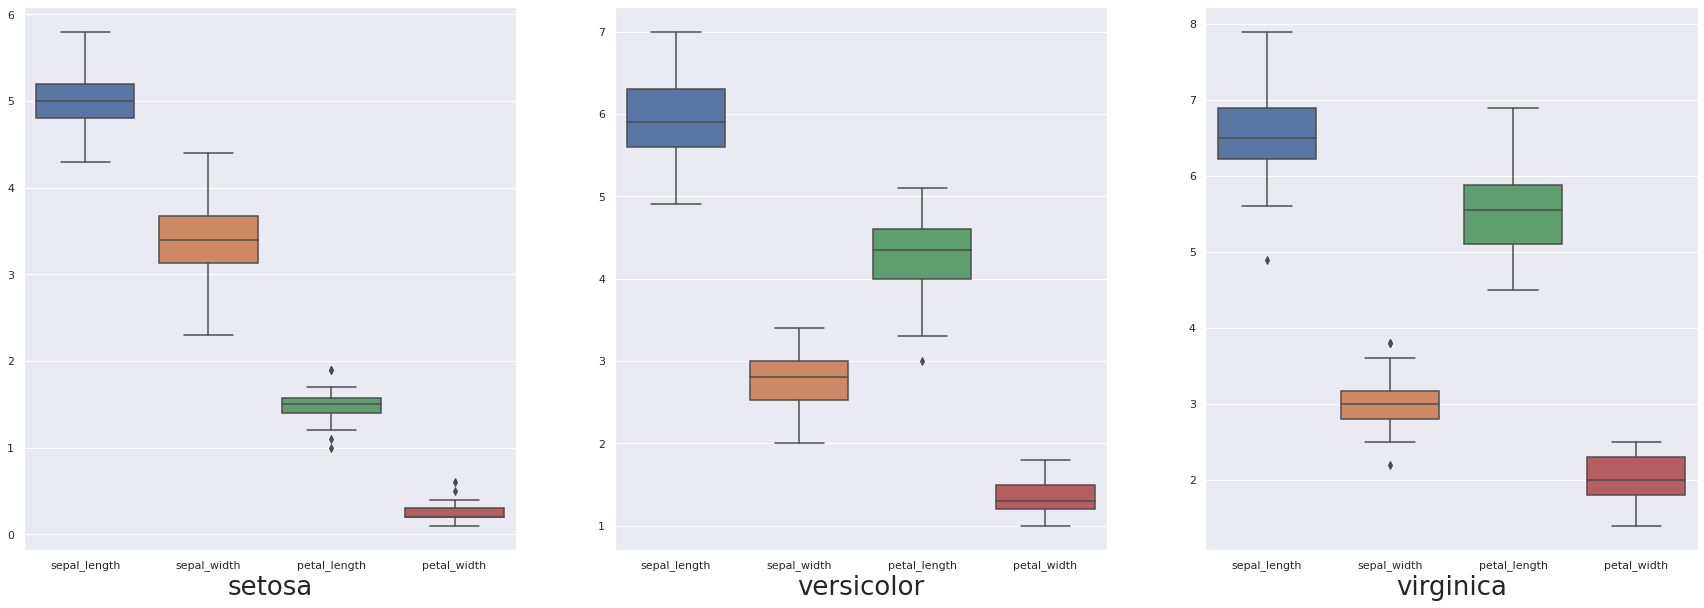

In [ ]:
fig, axes = plt.subplots(1, 3,figsize=(30,10))
i = 0

for specie in np.unique(data.species):

  subData = data[data.species==specie]
  sns.boxplot(ax=axes[i], data=subData)
  axes[i].set_xlabel(str(specie), fontsize=26)

  i+=1

plt.show(True) # Mostra o boxplot

Exibe o boxplot, separados pelo atríbuto, referente a cada espécie do dataset

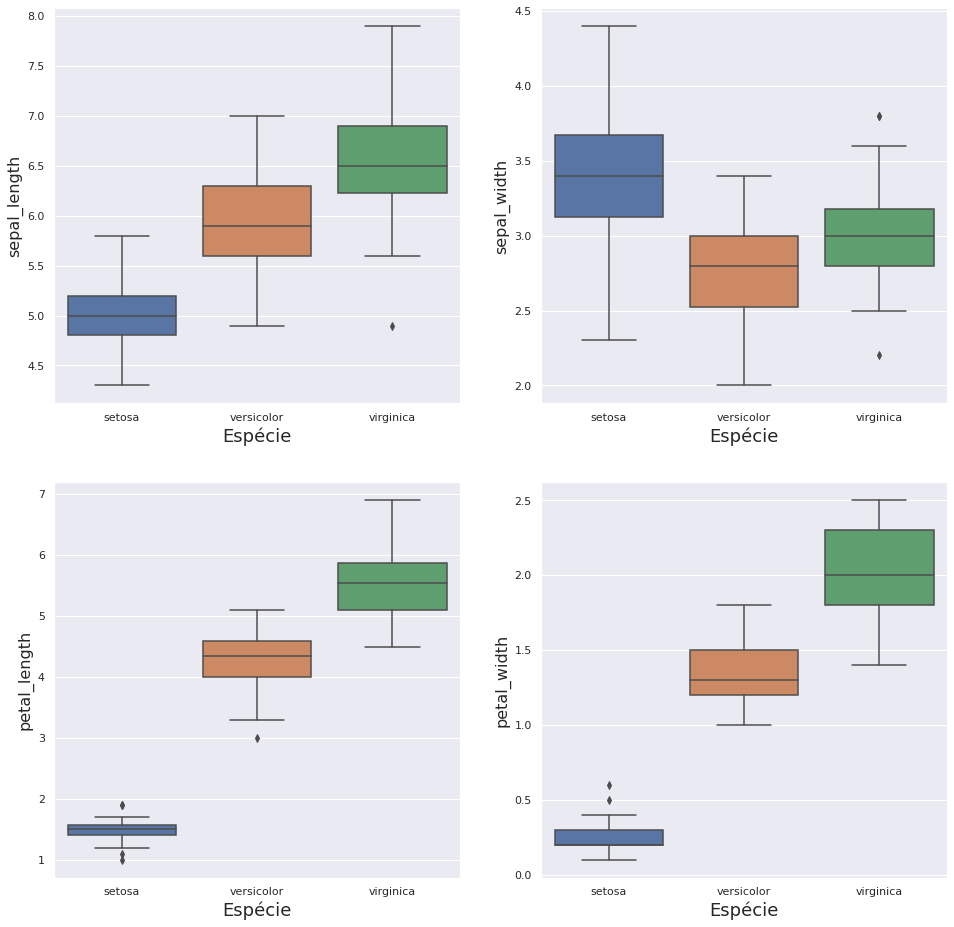

In [ ]:
n = 2
m = 2

i=0

fig, axes = plt.subplots(n, m,figsize=(16,16))

for variable in data.columns[0:(data.shape[1]-1)]:

  x = i//k
  y = i%k
  i+=1
  
  sns.boxplot(ax=axes[x,y],x="species", y=variable, data=data)
  axes[x,y].set_xlabel('Espécie', fontsize=18)
  axes[x,y].set_ylabel(variable, fontsize=16)

plt.show(True) # Mostra o boxplot

###4 - Para a função log(), investigue como as correlações de Pearson e Spearman variam de acordo com o intervalo dos dados.

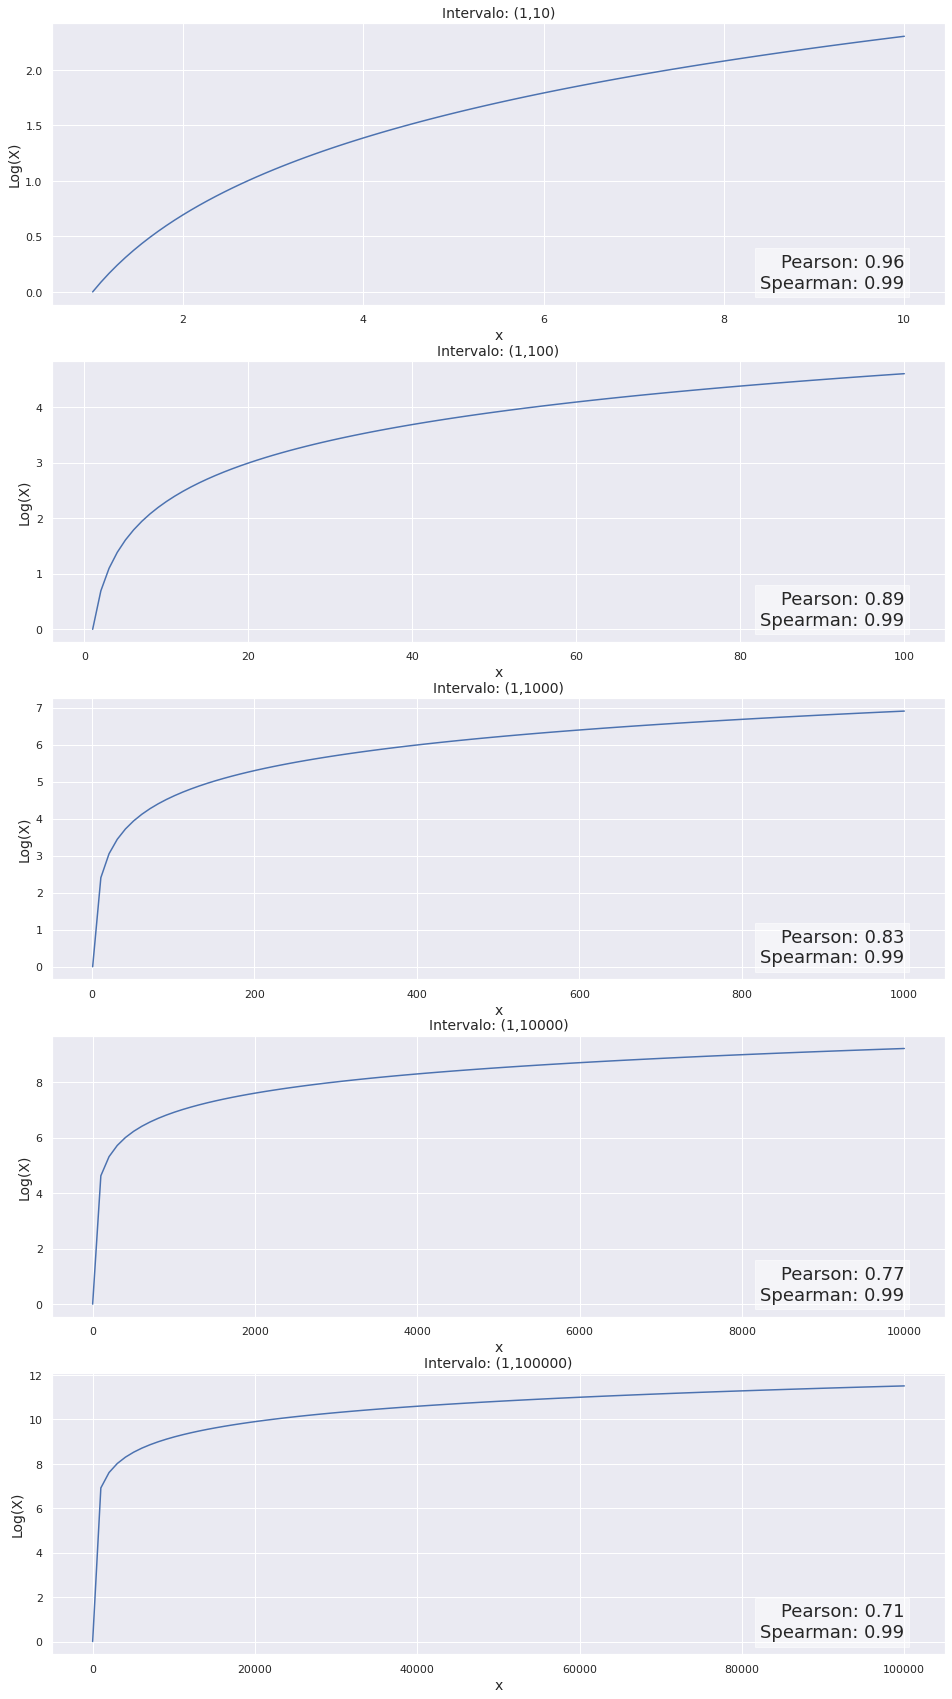

In [ ]:
N = 100 #Quantidade de pontos

fig, axes = plt.subplots(5, 1,figsize=(16,30))

for i in range(1,6):
  interval = 10**i # Cada intervalo vai aumentar exponencialmente (10,100,1000,...)
  x = np.linspace(1, interval, N) 
  z = np.log(x)

  axes[i-1].plot(x, z)
  axes[i-1].set_title("Intervalo: (1,"+str(interval)+")",fontsize=14)
  axes[i-1].set_xlabel("x",fontsize = 14) 
  axes[i-1].set_ylabel("Log(X)", fontsize = 14)

  # Calculo das correlações de Pearson e Spearman
  corr, p_value = pearsonr(x, z)
  corrs, p_values = spearmanr(x, z)

  corr = int(corr*100)/100
  corrs = int(corrs*100)/100

  # Plot de uma "legenda" que mostra as correlações
  axes[i-1].text(interval,0,'Pearson: '+str(corr)+'\nSpearman: '+str(corrs),
                 ha="right",va="bottom", fontsize=18,
                 bbox={"facecolor":"white", "alpha":0.5, "pad":5})

plt.show(True)

###5 - Considere o código acima que mostra como a correlação de Pearson muda com a inclusão de ruídos. Modifique a função para $Y=0.5∗X+ruído$. Varie o ruído e calcule os coeficientes de Pearson e Spearman, mostrando os respectivos scatterplots com os valores dos coeficientes (como feito no exemplo).

In [ ]:
N = 100
X = np.linspace(-1,1, N)
noise = np.random.uniform(-1,1,N)

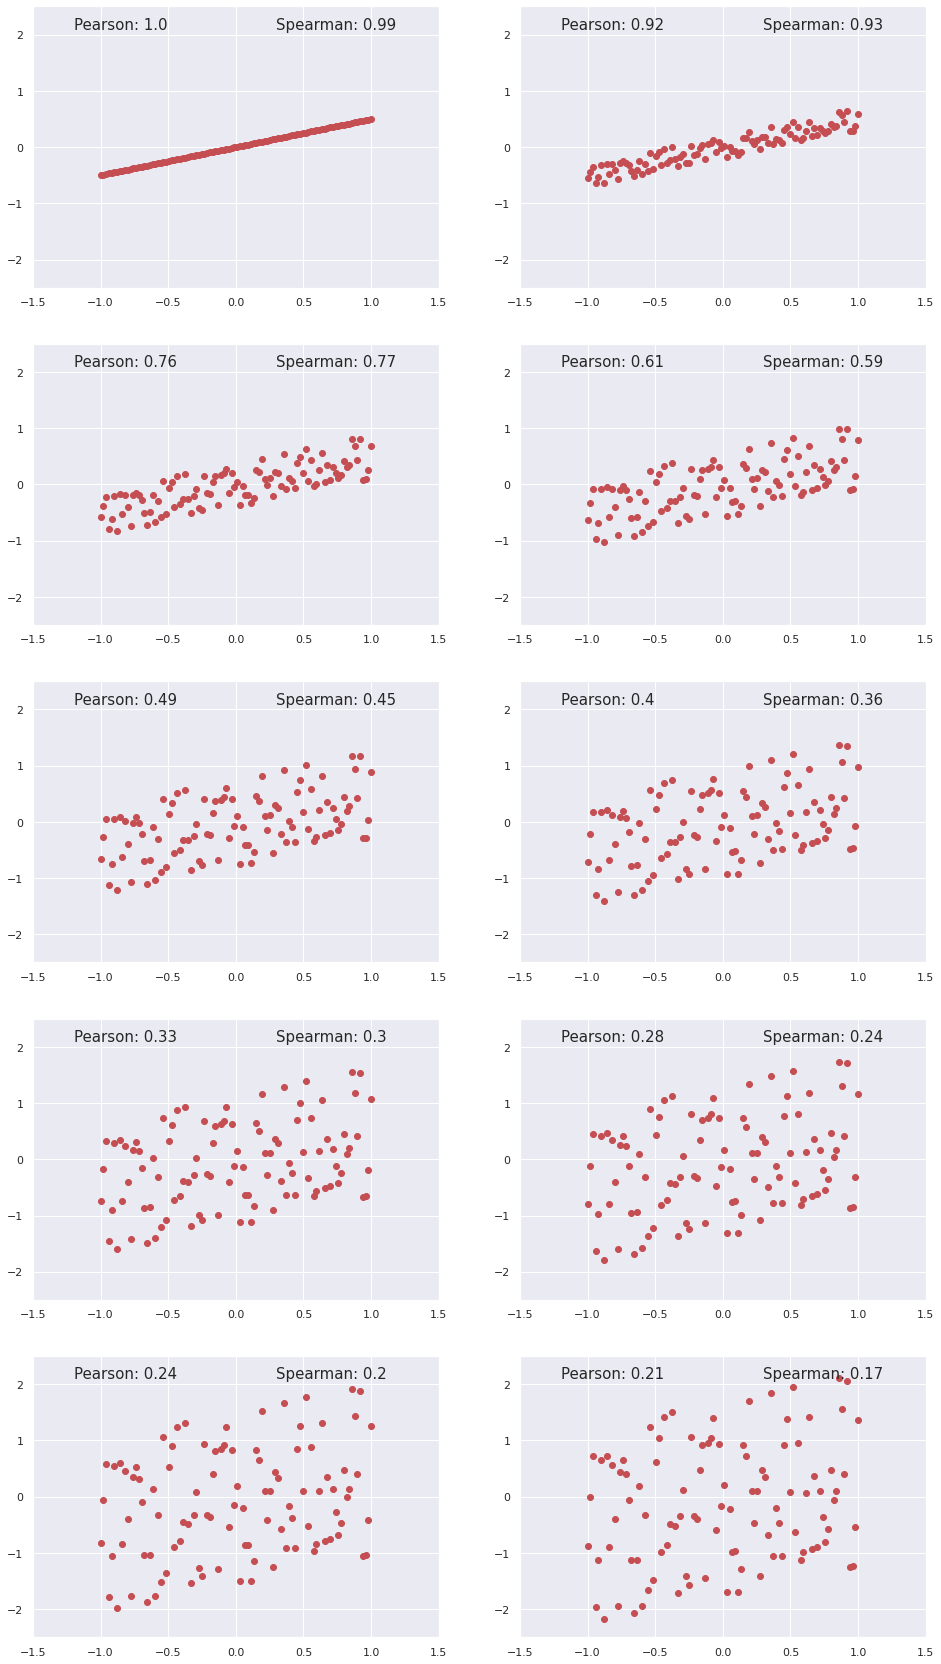

In [ ]:
n = 5
m = 2
i = 0

fig, axes = plt.subplots(n, m,figsize=(16,30))

# Para cada sigma:
for sigma in np.arange(0,2,0.2):
  Y = 0.5*X + noise*sigma

  # Calcula a posição do subplot
  x = i//m
  y = i%m

  axes[x,y].plot(X,Y, 'ro')

  # Calcula as correlações de Pearson e Spearman
  pr,valuepr = pearsonr(X, Y)
  sp,valuesp = spearmanr(X, Y)

  pr = int(pr*100)/100
  sp = int(sp*100)/100

  string = 'Pearson: '+ str(pr)
  axes[x,y].text(-1.2,2.1, string, fontsize=15)
  string = 'Spearman: '+ str(sp)
  axes[x,y].text(0.3,2.1, string, fontsize=15)

  axes[x,y].set_xlim(-1.5,1.5)
  axes[x,y].set_ylim(-2.5, 2.5)

  i+=1

plt.show(True)

###6- Considere os dados abaixo, chamado quarteto de Ascomb. Calcule a média, variância, correlação de Pearson e Spearman entre as variáveis x e y. O que você pode dizer sobre esses dados?

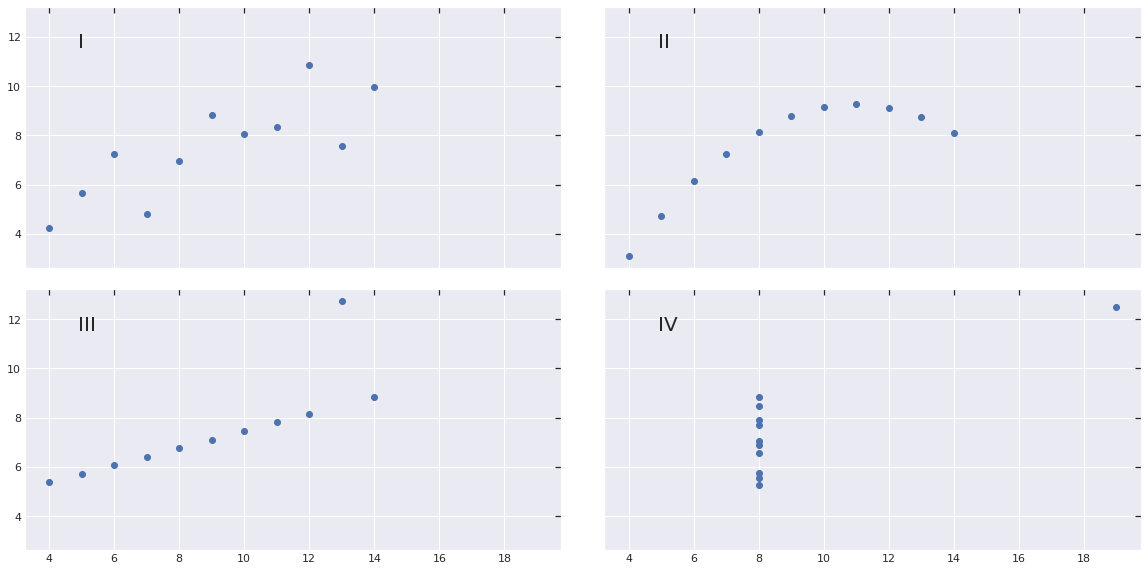

Dataset: I
Média:
	X: 9.0000 
	Y: 7.5009 
Variância:
	X: 10.0000 
	Y: 3.7521
Correlação:
	Person: 0.8164 
	Spearman: 0.8182 


Dataset: II
Média:
	X: 9.0000 
	Y: 7.5009 
Variância:
	X: 10.0000 
	Y: 3.7524
Correlação:
	Person: 0.8162 
	Spearman: 0.6909 


Dataset: III
Média:
	X: 9.0000 
	Y: 7.5000 
Variância:
	X: 10.0000 
	Y: 3.7478
Correlação:
	Person: 0.8163 
	Spearman: 0.9909 


Dataset: IV
Média:
	X: 9.0000 
	Y: 7.5009 
Variância:
	X: 10.0000 
	Y: 3.7484
Correlação:
	Person: 0.8165 
	Spearman: 0.5000 




In [ ]:
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(20, 10),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')
plt.show()

# Para cada dataset:
for key, value in datasets.items():

  # Calcula a média do X e do Y
  mX = np.mean(value[0])
  mY = np.mean(value[1])

  # Calcula a variância do X e do Y
  varX = sum((Xi - mX) ** 2 for Xi in value[0]) / len(value[0]) # Calcula a variância de X
  varY = sum((Yi - mY) ** 2 for Yi in value[1]) / len(value[1]) # Calcula a variância de Y

  print("Dataset:",key)
  print("Média:\n\tX: %.4f"%mX,
        "\n\tY: %.4f"%mY,
        "\nVariância:\n\tX: %.4f"%varX,
        "\n\tY: %.4f"%varY)
  print("Correlação:\n\tPerson: %.4f"%pearsonr(value[0], value[1])[0],
        "\n\tSpearman: %.4f"%spearmanr(value[0], value[1])[0],"\n\n")

As médias entre todas as variáveis X's e Y's, bem como as variâncias e a correlação de Pearson possuem valores muito próximos e parecidos entre si para cada dataset dado, sendo a correlação de Spearman a que mais variou.